# Random Forest Regression: Sklearn

We have one independent variable Temperature and one independent variable Revenue which we have to predict. In this problem, we have to build a Random Forest Regression Model which will study the correlation between the Temperature and Revenue of the Ice Cream Shop and predict the revenue for the ice cream shop based on the temperature on a particular day.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Load data

In [2]:
url = "https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv"
df = pd.read_csv(url)
df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


## Explore data

In [3]:
# show descriptive statistics
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


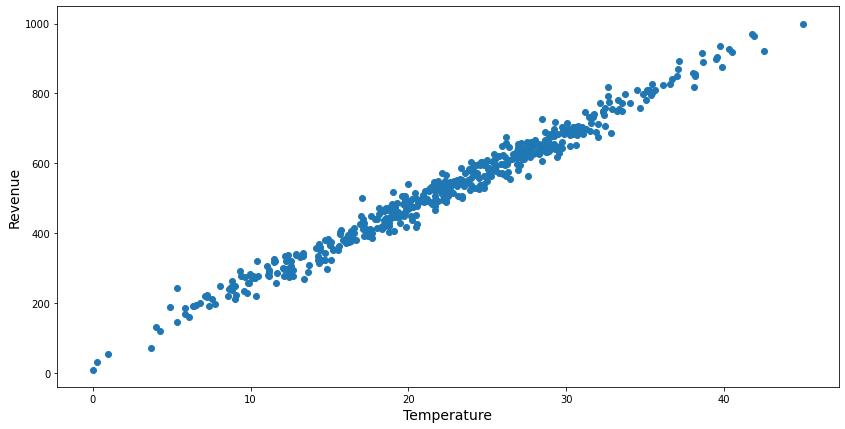

In [4]:
# plot temperature against revenue
plt.figure(figsize=(14,7))
plt.scatter(df["Temperature"], df["Revenue"])
plt.xlabel("Temperature", fontsize=14)
plt.ylabel("Revenue", fontsize=14)
plt.show()

## Declare features and targets

In [5]:
# create features (X) and targets (y)
y = df[["Revenue"]].values
X = df[["Temperature"]].values

## Train-Test Split

In [6]:
# 90:10 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=42)

## Train Random Forest Model

In [7]:
# build and train random forest model
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Test Random Forest Model

In [8]:
# compute predictions
yhat = regressor.predict(X_test)

In [9]:
# compare predictions with actuals in table
eval_df = pd.DataFrame({"Actuals": y_test.reshape(-1), "Predictions": yhat, "%-Error": np.abs(((yhat-y_test.reshape(-1))/y_test.reshape(-1))*100)})
eval_df

,Actuals,Predictions,%-Error
0,659.873287,698.708383,5.885235
1,623.248701,613.827099,1.511692
2,559.135869,595.222103,6.453929
3,497.752318,495.198163,0.513138
4,627.901841,606.211022,3.454492
5,300.932273,299.345340,0.527339
6,278.731962,292.195918,4.830432
7,319.349462,305.619451,4.299369
8,483.489769,530.199474,9.660950
9,683.544781,696.403514,1.881184


In [10]:
# compute mean percentage error
eval_df.loc[:, "%-Error"].mean()

5.190520699244712

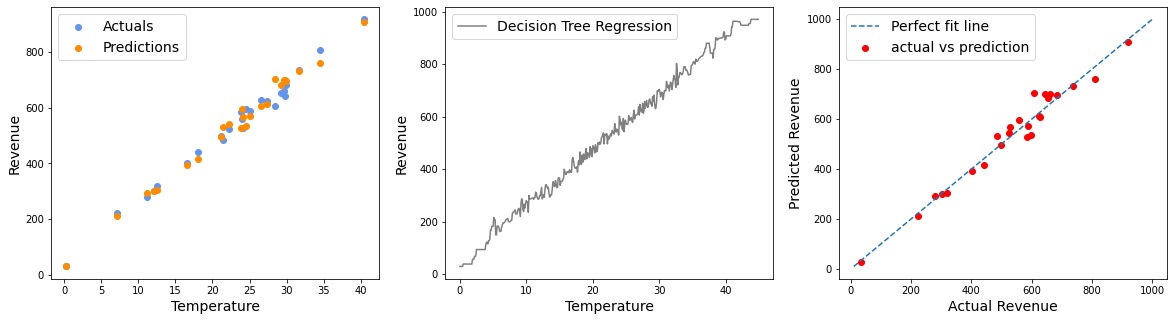

In [11]:
# plot predictions against actuals
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

axes[0].scatter(X_test, y_test.reshape(-1), color="cornflowerblue", label="Actuals")
axes[0].scatter(X_test, yhat, color="darkorange", label="Predictions")
axes[0].set_xlabel("Temperature", fontsize=14)
axes[0].set_ylabel("Revenue", fontsize=14)
axes[0].legend(fontsize=14)

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
axes[1].plot(X_grid, regressor.predict(X_grid), color = 'grey', label="Decision Tree Regression")
axes[1].set_xlabel("Temperature", fontsize=14)
axes[1].set_ylabel("Revenue", fontsize=14)
axes[1].legend(fontsize=14)

axes[2].scatter(y_test.reshape(-1), yhat, color="red", label="actual vs prediction")
axes[2].plot(np.arange(min(y), max(y)), np.arange(min(y), max(y)), linestyle="dashed", label="Perfect fit line")
axes[2].set_xlabel("Actual Revenue", fontsize=14)
axes[2].set_ylabel("Predicted Revenue", fontsize=14)
axes[2].legend(fontsize=14)

plt.show()

From the above values, we infer that the model is able to predict the values of the y_test with a good accuracy though it can be improved by tuning the hyper-parameters such as n_estimators and max_depth.